In [1]:
import string
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from feature_engine.encoding import StringSimilarityEncoder

In [2]:
# Helper function for loading and preprocessing data
def load_titanic() -> pd.DataFrame:
    translate_table = str.maketrans('' , '', string.punctuation)
    data = pd.read_csv('https://www.openml.org/data/get_csv/16826755/phpMYEkMl')
    data = data.replace('?', np.nan)
    data['home.dest'] = (
        data['home.dest']
        .str.strip()
        .str.translate(translate_table)
        .str.replace('  ', ' ')
        .str.lower()
    )
    data['name'] = (
        data['name']
        .str.strip()
        .str.translate(translate_table)
        .str.replace('  ', ' ')
        .str.lower()
    )
    data['ticket'] = (
        data['ticket']
        .str.strip()
        .str.translate(translate_table)
        .str.replace('  ', ' ')
        .str.lower()
    )
    return data

In [3]:
# Load dataset
data = load_titanic()

# Separate into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(['survived', 'sex', 'cabin', 'embarked'], axis=1),
    data['survived'],
    test_size=0.3,
    random_state=0
)

## StringSimilarityEncoder

In [4]:
# set up the encoder
encoder = StringSimilarityEncoder(top_categories=2, variables=['name', 'home.dest', 'ticket'])

# fit the encoder
encoder.fit(X_train)

StringSimilarityEncoder(top_categories=2,
                        variables=['name', 'home.dest', 'ticket'])

In [5]:
# lets see what categories we will be comparing to others
encoder.encoder_dict_

{'name': ['mellinger miss madeleine violet', 'barbara mrs catherine david'],
 'home.dest': ['', 'new york ny'],
 'ticket': ['ca 2343', 'ca 2144']}

In [6]:
# transform the data
train_t = encoder.transform(X_train)
test_t = encoder.transform(X_test)

# check output
train_t.head(5)

,pclass,age,sibsp,parch,fare,boat,body,name_mellinger miss madeleine violet,name_barbara mrs catherine david,home.dest_nan,home.dest_new york ny,ticket_ca 2343,ticket_ca 2144
501,2,13,0,1,19.5,14,NaN,1.000000,0.517241,0.0,0.375000,0.307692,0.461538
588,2,4,1,1,23,14,NaN,0.521739,0.380952,0.0,0.571429,0.333333,0.333333
402,2,30,1,0,13.8583,12,NaN,0.644068,0.618182,0.0,0.368421,0.526316,0.631579
1193,3,NaN,0,0,7.725,NaN,NaN,0.510638,0.511628,1.0,0.000000,0.333333,0.166667
686,3,22,0,0,7.725,13,NaN,0.666667,0.679245,0.0,0.344828,0.461538,0.461538


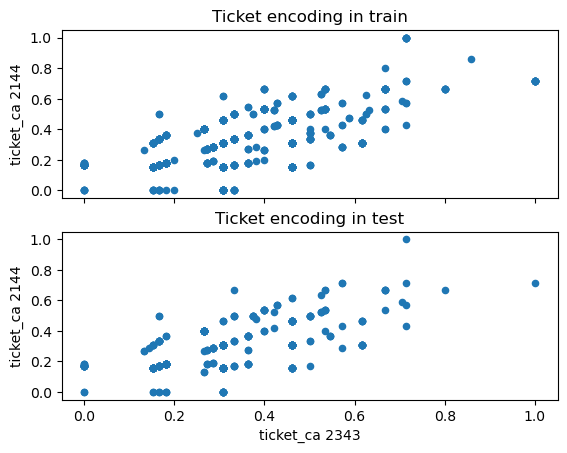

In [7]:
# plot encoded column - ticket
# OHE could produce only 0, but SSE produces values in [0,1] range
fig, ax = plt.subplots(2, 1);
train_t.plot(kind='scatter', x='ticket_ca 2343', y='ticket_ca 2144', sharex=True, title='Ticket encoding in train', ax=ax[0]);
test_t.plot(kind='scatter', x='ticket_ca 2343', y='ticket_ca 2144', sharex=True, title='Ticket encoding in test', ax=ax[1]);

In [8]:
from sklearn.impute import SimpleImputer

# We can first impute missing values or drop them
imputer = SimpleImputer(strategy='constant', fill_value='missing')

# Assuming 'data' contains your Titanic dataset
data[['name', 'home.dest', 'ticket']] = imputer.fit_transform(data[['name', 'home.dest', 'ticket']])

# Now applying the StringSimilarityEncoder without 'handle_missing'
encoder = StringSimilarityEncoder(
    top_categories=2,
    variables=['name', 'home.dest', 'ticket']
)

# Transforming the data
encoded_data = encoder.fit_transform(data[['name', 'home.dest', 'ticket']])

# Display the encoded data
encoded_data.head()

,name_connolly miss kate,name_kelly mr james,home.dest_missing,home.dest_new york ny,ticket_ca 2343,ticket_1601
0,0.622222,0.439024,0.444444,0.272727,0.333333,0.666667
1,0.652174,0.476190,0.235294,0.368421,0.153846,0.400000
2,0.636364,0.500000,0.235294,0.368421,0.153846,0.400000
3,0.615385,0.416667,0.235294,0.368421,0.153846,0.400000
4,0.491803,0.385965,0.235294,0.368421,0.153846,0.400000


In [9]:
# refiting the encoder
encoder.fit(X_train)

StringSimilarityEncoder(top_categories=2,
                        variables=['name', 'home.dest', 'ticket'])

In [10]:
# lets see what categories we will be comparing to others
encoder.encoder_dict_

{'name': ['mellinger miss madeleine violet', 'barbara mrs catherine david'],
 'home.dest': ['', 'new york ny'],
 'ticket': ['ca 2343', 'ca 2144']}

In [11]:
# transform the data
train_t = encoder.transform(X_train)
test_t = encoder.transform(X_test)
# check output
train_t.head(5)

,pclass,age,sibsp,parch,fare,boat,body,name_mellinger miss madeleine violet,name_barbara mrs catherine david,home.dest_nan,home.dest_new york ny,ticket_ca 2343,ticket_ca 2144
501,2,13,0,1,19.5,14,NaN,1.000000,0.517241,0.0,0.375000,0.307692,0.461538
588,2,4,1,1,23,14,NaN,0.521739,0.380952,0.0,0.571429,0.333333,0.333333
402,2,30,1,0,13.8583,12,NaN,0.644068,0.618182,0.0,0.368421,0.526316,0.631579
1193,3,NaN,0,0,7.725,NaN,NaN,0.510638,0.511628,1.0,0.000000,0.333333,0.166667
686,3,22,0,0,7.725,13,NaN,0.666667,0.679245,0.0,0.344828,0.461538,0.461538


In [12]:
# check output
test_t.head(5)

,pclass,age,sibsp,parch,fare,boat,body,name_mellinger miss madeleine violet,name_barbara mrs catherine david,home.dest_nan,home.dest_new york ny,ticket_ca 2343,ticket_ca 2144
1139,3,38,0,0,7.8958,NaN,NaN,0.454545,0.550000,1.0,0.000000,0.461538,0.461538
533,2,21,0,1,21,12,NaN,0.615385,0.524590,0.0,0.370370,0.307692,0.307692
459,2,42,1,0,27,NaN,NaN,0.596491,0.603774,0.0,0.352941,0.461538,0.461538
1150,3,NaN,0,0,14.5,NaN,NaN,0.641509,0.693878,1.0,0.000000,0.307692,0.307692
393,2,25,0,0,31.5,NaN,NaN,0.408163,0.666667,0.0,0.437500,0.666667,0.666667


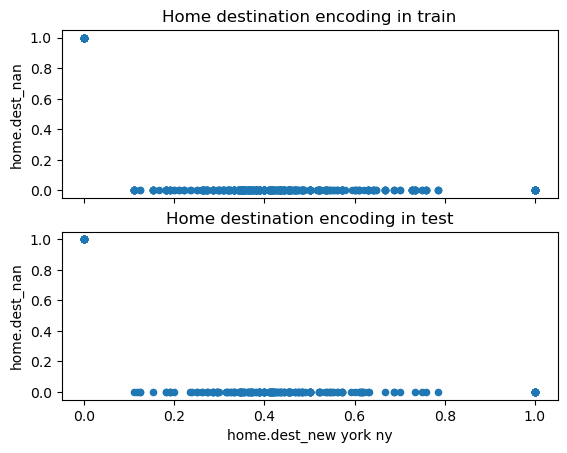

In [13]:
# plot encoded column - home.dest
fig, ax = plt.subplots(2, 1);
train_t.plot(
    kind='scatter',
    x='home.dest_new york ny',
    y='home.dest_nan',
    sharex=True,
    title='Home destination encoding in train',
    ax=ax[0]
);
test_t.plot(
    kind='scatter',
    x='home.dest_new york ny',
    y='home.dest_nan',
    sharex=True,
    title='Home destination encoding in test',
    ax=ax[1]
);

## Note on dimensionality reduction

In [14]:
# These encoded columns could also be compressed further to reduce dimensions
# since they are not boolean, but real numbers
from sklearn.decomposition import PCA

from feature_engine.imputation import CategoricalImputer

In [15]:
# Step 1: Handle missing values for 'home.dest' using CategoricalImputer
imputer = CategoricalImputer(imputation_method='missing', variables=['home.dest'])
data['home.dest'] = imputer.fit_transform(data[['home.dest']])

# Step 2: Define and apply the StringSimilarityEncoder
encoder = StringSimilarityEncoder(
    top_categories=None,  # or set to an integer if you want to limit categories
    variables=['home.dest']
)

# Fit and transform the encoder
encoded_data = encoder.fit_transform(data[['home.dest']])

# Display the encoded data
encoded_data.head()

,home.dest_missing,home.dest_new york ny,home.dest_london,home.dest_montreal pq,home.dest_paris france,home.dest_cornwall akron oh,home.dest_winnipeg mb,home.dest_sweden worcester ma,home.dest_philadelphia pa,home.dest_wiltshire england niagara falls ny,...,home.dest_england philadelphia pa,home.dest_janjgir india pennsylvania,home.dest_west kensington london,home.dest_clevedon england,home.dest_auburn ny,home.dest_walthamstow england,home.dest_india rapid city sd,home.dest_kontiolahti finland detroit mi,home.dest_devonport england,home.dest_antwerp belgium stanton oh
0,0.444444,0.272727,0.352941,0.454545,0.260870,0.357143,0.272727,0.466667,0.230769,0.311111,...,0.235294,0.27027,0.545455,0.222222,0.200000,0.400000,0.333333,0.390244,0.357143,0.540541
1,0.235294,0.368421,0.303030,0.578947,0.512821,0.590909,0.368421,0.652174,0.380952,0.557377,...,0.520000,0.45283,0.530612,0.558140,0.277778,0.565217,0.478261,0.596491,0.590909,0.716981
2,0.235294,0.368421,0.303030,0.578947,0.512821,0.590909,0.368421,0.652174,0.380952,0.557377,...,0.520000,0.45283,0.530612,0.558140,0.277778,0.565217,0.478261,0.596491,0.590909,0.716981
3,0.235294,0.368421,0.303030,0.578947,0.512821,0.590909,0.368421,0.652174,0.380952,0.557377,...,0.520000,0.45283,0.530612,0.558140,0.277778,0.565217,0.478261,0.596491,0.590909,0.716981
4,0.235294,0.368421,0.303030,0.578947,0.512821,0.590909,0.368421,0.652174,0.380952,0.557377,...,0.520000,0.45283,0.530612,0.558140,0.277778,0.565217,0.478261,0.596491,0.590909,0.716981


In [16]:
# refiting the encoder
encoder.fit(X_train)

StringSimilarityEncoder(variables=['home.dest'])

In [17]:
# transform the data
train_t = encoder.transform(X_train)

train_t.shape

(916, 295)

In [18]:
# take home.dest encoded columns
home_encoded = train_t.filter(like='home.dest')

# defining PCA for compression
pca = PCA(n_components=0.9)

# train PCA
pca.fit(home_encoded)

PCA(n_components=0.9)

In [19]:
# transform train and test datasets
train_compressed = pca.transform(home_encoded)

train_compressed.shape

(916, 1)